# IQ01 - TP03 - exercice 1
### Julien Krause

## Exercice 1 : l’algorithme de Deutsch-Jozsa

## A. Problème
Dans cette exercice, nous devons résoudre le problème suivant: 
Nous avons une fonction mathématique  f:{$0,1$}$^𝑛→${$0,1$} Cette fonction est une boite noire mais nous savons qu'elle est soit constante (la sortie est 0 ou 1 pour toutes les entrées) soit équilibrée (la sortie 
est 0 dans la moitié des cas, 1 dans les autres). On sait que pour un algorithme classique et déterministe est utilisé alors il faut 2n−1+1 évaluation de la fonction F pour déterminer si elle est constante ou équilibrée.
Il est est question dans cette exercice d'implémenter l'algorithme quantique de Deutsch-Jozsa dont nous avons suivi l'éxplication ici: https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html#1.3-Quantum-Solution--Questions Dans un premier temps nous allons travailler sur une version de cet algorithme pour l'exemple d'une fonction à trois bits représenté par des fonction oracles constantes et équilibrées (que l'on nommera simplement oracles). Tout d'abord, faisons nos importations:

## B. L’algorithme Deutsch-Jozsa

In [ ]:
 # Initialisation
import numpy as np

# Import Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, assemble, transpile

# Import des outils graphiques
from qiskit.visualization import plot_histogram

 Mise en place des oracles: 
 
 Dans un premier temps, pour nous familiariser avec les oracles contants et équilibrés nous allons en implémenter:Tout d'abord, nous fixons la taille du registre d'entrée de nos oracles.
  Commençons par créer un oracle constant, dans ce cas l'entrée n'a pas d'effet sur la sortie, donc nous fixons aléatoirement le qubit de sortie à 0 ou 1 :

In [ ]:
n = 3
const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

 Ensuite, nous créons un oracle équilibré.  Nous pouvons créer un oracle équilibré en effectuant des CNOTs avec chaque qubit d'entrée comme contrôle et le bit de sortie comme cible. Nous pouvons varier les états d'entrée qui donnent 0 ou 1 en enveloppant certains des contrôles dans des X-gates. Choisissons d'abord une chaîne binaire de longueur n qui dicte les contrôles à envelopper :

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

 Maintenant que nous avons cette chaîne, nous pouvons l'utiliser comme clé pour placer nos X-gates. Pour chaque qubit dans notre circuit, nous plaçons une X-gate si le chiffre correspondant dans b_str est 1, ou ne faisons rien si le chiffre est 0.

In [ ]:
 # On place nos portes X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────

 Ensuite, nous faisons nos portes C-NOT, en utilisant chaque qubit d'entrée comme contrôle, et le qubit de sortie comme cible :

In [ ]:
# On divise avec des barrières
balanced_oracle.barrier()

# On met en place l'oracle équilibré
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

 Enfin, nous répétons le code à partir de deux cellules pour finir d'envelopper les contrôles dans des portes X :

In [ ]:
# On place nos portes X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# présentation de l'oracle équilibré obtenu:
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

 Mise en place de l'algorithme complet: 
 
 Dans un second temps passons à la mise en place de l'algorithme Deutsch-Jozsa . La première étape de l'algorithme consiste à initialiser les qubits d'entrée dans l'état |+⟩ et le qubit de sortie dans l'état  |-⟩:

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# On applique H
for qubit in range(n):
    dj_circuit.h(qubit)

# On met le qubit dans l'état |->
dj_circuit.x(n)
dj_circuit.h(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

 Ensuite, appliquons l'oracle. Ici, nous appliquons l'oracle équilibré: balanced_oracle que nous avons créé plus haut :

In [ ]:
dj_circuit = QuantumCircuit(n+1, n)

# Application de portes H
for qubit in range(n):
    dj_circuit.h(qubit)

# On met le qubit dans l'état |->
dj_circuit.x(n)
dj_circuit.h(n)

# On ajoute notre oracle
dj_circuit += balanced_oracle
dj_circuit.draw()

TypeError: unsupported operand type(s) for +=: 'QuantumCircuit' and 'QuantumCircuit'

 Enfin, nous appliquons des portes H sur les  n-qubits d'entrée, et mesurons notre registre d'entrée :

In [ ]:
# On repète l'application des portes H
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# On mesure
for i in range(n):
    dj_circuit.measure(i, i)

# On affiche le circuit
dj_circuit.draw()

┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ H ├─░─┤M├──────
     ├───┤├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├┤ H ├─░──╫─┤M├───
     ├───┤├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░──╫──╫──╫─
     └───┘└───┘ ░  ║  ║  ║ 
c: 3/══════════════╩══╩══╩═
                   0  1  2

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_76336/3463803570.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


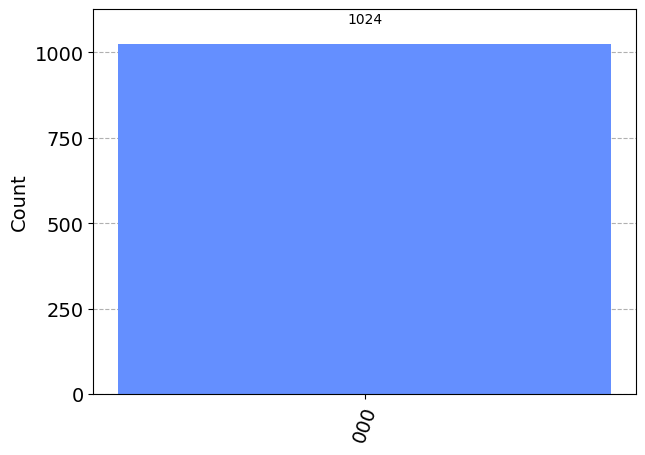

In [ ]:
 # Utilisation s'un simulateur locale
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

 Nous pouvons voir d'après les résultats ci-dessus que nous avons 0 % de chance de mesurer 000. 
 
 Généralisation pour n bits 
 
 Dans un troisième et dernier temps mettons en place une fonction généralisée qui crée des oracles de Deutsch-Jozsa et les transforme en portes quantiques. Elle prend le cas, soit 'équilibré' soit 'constant', et n, la taille du registre d'entrée :

In [ ]:
def dj_oracle(case, n):
    # Nous avons besoin de créer un objet QuantumCircuit à retourner
    # Ce circuit a n+1 qubits : 
    # la taille de l'entrée,
    # + un qubit de sortie
    oracle_qc = QuantumCircuit(n+1)
    
    # Tout d'abord, traitons le cas où l'oracle est équilibré
    if case == "balanced":
        # D'abord on génére un nombre aléatoire qui nous indique quels CNOTs à
        # envelopper dans des portes X :
        b = np.random.randint(1,2**n)
        # Ensuite, on formate 'b' comme une chaîne binaire de longueur 'n', complétée par des zéros :
        b_str = format(b, '0'+str(n)+'b')
        # Ensuite, nous plaçons les premières portes X. Chaque chiffre de notre chaîne binaire 
        # correspond à un qubit, si le chiffre est 0, on ne fait rien, si c'est 1
        # on applique une X-gate à ce qubit :
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # On met en place les portes C-NOT pour chaque qubit, en utilisant le qubit de sortie 
        # comme cible :
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Ensuite, on place les dernières portes X
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Cas dans lequel l'oracle est constant
    if case == "constant":
        # D'abord on décide ce que sera la sortie fixe de l'oracle
        # (soit toujours 0, soit toujours 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

 Pour finir créons une fonction qui prend cette porte oracle et exécute l'algorithme de Deutsch-Jozsa sur celle-ci :

In [ ]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Configuration du qubit de sortie :
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Et configuration du registre d'entrée :
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Ajoutons la porte de l'oracle à notre circuit :
    dj_circuit.append(oracle, range(n+1))
    # Enfin, nous appliquons à nouveau les portes H et on mesure :
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

 Enfin, faisons un test avec l'algorithme final pour un oracle équilibré et n = 4 :

In [ ]:
n = 4
oracle_gate1 = dj_oracle('balanced', n)
dj_circuit1 = dj_algorithm(oracle_gate1, n)
dj_circuit1.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_76336/2419672025.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results1 = aer_sim.run(qobj1).result()


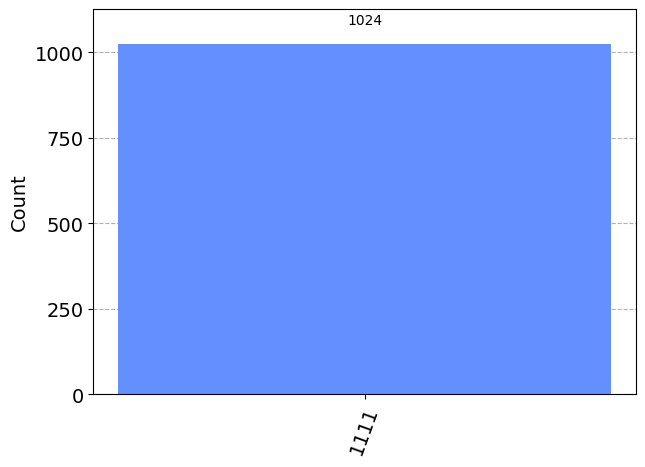

In [ ]:
transpiled_dj_circuit1 = transpile(dj_circuit1, aer_sim)
qobj1 = assemble(transpiled_dj_circuit1)
results1 = aer_sim.run(qobj1).result()
answer1 = results1.get_counts()
plot_histogram(answer1)

In [ ]:
n = 4
oracle_gate2 = dj_oracle('constant', n)
dj_circuit2 = dj_algorithm(oracle_gate2, n)
dj_circuit2.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

/var/folders/0l/p5gygr8524q2lxdt1kyk3n4h0000gn/T/ipykernel_76336/2896960200.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results2 = aer_sim.run(qobj2).result()


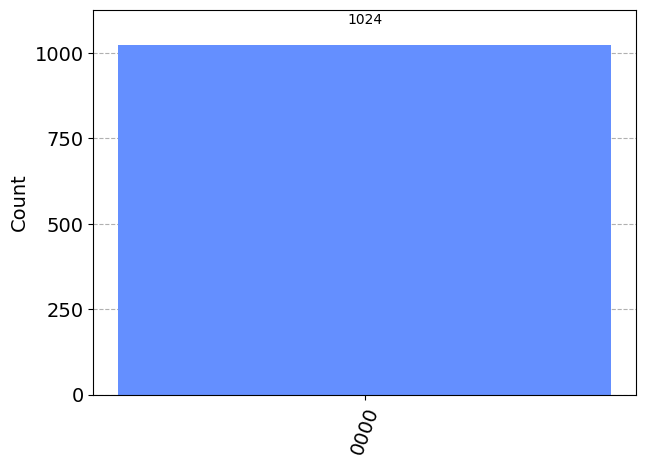

In [ ]:
transpiled_dj_circuit2 = transpile(dj_circuit2, aer_sim)
qobj2 = assemble(transpiled_dj_circuit2)
results2 = aer_sim.run(qobj2).result()
answer2 = results2.get_counts()
plot_histogram(answer2)

Les résultats correspondent tout à fait à nos attentes: 

Nous pouvons voir d'après les résultats ci-dessus que nous avons 0 % de chance de mesurer 0000 pour le premier test. cela prédit correctement que la fonction est équilibrée.

Nous pouvons voir d'après les résultats ci-dessus que nous avons 0 % de chance de mesurer 1111 pour le deuxième test. cela prédit correctement que la fonction est constante.